# How high of an incentive (measured through differences in overall GPA) do students face by enrolling in classes with relatively higher grade distributions?


## Diego Saldonid, PID: A12012095
## Roger Ruan, PID: A11186574
## Shu-Wei(Lucas) Hsu, PID: A12961177
## James Mata, PID: A12462782


## Introduction and Background

With grade inflation becoming a growing problem between public and private school we were interested in taking a closer look to see what may be happening within a school. As students, we often hear advice on which professor to take for a certain class because the chances of getting a good grade are higher. For many students at UCSD, who plan to pursue careers that involve more education or careers in their subject’s job market, GPA is an important factor to look competitive in these fields. This leads students to wait for a class to be taught by a certain professor in order to boost their transcripts and have a higher chance at success. This leads us to our questions: 

* **What would be the difference in GPA between students that happen to take professors with lower grade distributions relative to their fellow professors?**
* **If we are able to find a large enough disparity between these students, what would be our call to action?**
* **Furthermore, what might this reflect on the way classes are being taught, not only at UCSD but at other Universities?**
* **How can having a different GPA significantly impact one's future career such as graduate school and job hunting?**

As our reference allude to, just because they are getting higher grades does not imply that students are performing higher or learning more. The growing competition to get into medical school, grad school, or other competitive career fields incentives students to pursue a higher grade over leaving college with technical skills and knowledge. Also, are the classes with higher distribution, are they not challenging students as much or do they provide a better teaching environment?



## Data Description

The dataset used for our project is the UCSD Cape Evaluations, found at https://cape.ucsd.edu/responses/Results.aspx. This dataset has grade distributions for various classes among multiple disciplines at UCSD from Spring quarter 2007 to Spring Quarter 2017. We will be focusing on the following select majors: 

* Cognitive Science
* Biology
* Biochemistry
* Mechnical and Aerospace Engineering
* Chemistry
* Computer Science
    
From these majors, we will be analyzing required major courses.

Each data row has the following columns: 

* Professor/Instructor
* Course
* Term
* Number of Enrollment
* Number of Evaluations Made
* Recommended Class
* Recommended Instructor
* Study Hours/week
* Average Grade Expected
* Average Grade Received

After cleaning our data, we will be focusing on Instructor, Course, Term, Rcmnd Instr, Study Hrs/wk, and Avg Grade Received.

By comparing different students across different professors taken at different times we will be able to analyze any changes between professors as well as pick up on any trends that are happening within a certain department. By tracking the changes across multiple departments (to have an accurate representation of what is happening campus wide) we can compare how changes at UCSD agree or disagree with national trends. We will also compare the amount of study hours between the courses taught by professors of the same department, this will serve as an indicator on how rigorous classes may be, which may point to the differences in grade distributions.

After scraping the data, we disregard ones with NaN rows and data where the number of evaluations made for the class is under 40%.

Loading modules. We are using the beautiful soup library to scrap through different categories that are given with evaluations.

In [4]:
import ssl
import urllib.request
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
import math

Here, we are setting up the dataframe for the data we are going to scrap. We create a function called scrapData that goes through the online dataset with a specified major and extract the data onto our dataframe. We create a variable of the column values and then create a dataframe using the implemented column variables. 

In [5]:
#all courses
def scrapData(links, i, dfT):
    gcontext = ssl.SSLContext(ssl.PROTOCOL_TLSv1)
    req = urllib.request.Request(url="https://cape.ucsd.edu/responses/Results.aspx?Name=&CourseNumber=" + links[i],
        data=b'None',headers={'User-Agent':' Mozilla/5.0 (Windows NT 6.1; WOW64; rv:12.0) Gecko/20100101 Firefox/12.0'})
    handler = urllib.request.urlopen(req, context=gcontext)
    htmltext = handler.read()
    soup = BeautifulSoup(htmltext,'lxml')

    # Create four variables to score the scraped data in
    Name = []
    course = []
    courseNum = []
    rcmndClass = []
    term = []
    enroll = []
    evalMade = []
    rcmndInstructor = []
    studyHrs = []
    avgGradeExpected = []
    avgGradeRecieved = []

    # Create an object of the first object that is class=dataframe
    table = soup.find(class_='styled')

    # Find all the <tr> tag pairs, skip the first one, then for each.
    for row in table.find_all('tr')[1:]:

        spans = row.find_all('span')
        a = row.find_all('a')

        # Create a variable of all the <td> tag pairs in each <tr> tag pair,
        col = row.find_all('td')

        # Create a variable of the string inside 1st <td> tag pair,
        column_1 = col[0].string
        # and append it to first_name variable
        Name.append(column_1)

        #find class name
        column_10 = a[0].text
        course.append(column_10)

        column_11 = a[0].text
        x = column_11.split("-")[0]
        x = x.split(" ")[1]
        courseNum.append(x)

        # Create a variable of the string inside 2nd <td> tag pair,
        column_2 = spans[1].text
        # and append it to last_name variable
        rcmndClass.append(column_2)

        # Create a variable of the string inside 3rd <td> tag pair,
        column_3 = col[2].string
        # and append it to age variable
        term.append(column_3)

        # Create a variable of the string inside 4th <td> tag pair,
        column_4 = col[3].text
        # and append it to enroll variable
        enroll.append(column_4)

        # Create a variable of the string inside 5th <td> tag pair,
        column_5 = spans[0].text
        # and append it to postTestScore variable
        evalMade.append(column_5)

        column_6 = spans[2].text
        rcmndInstructor.append(column_6)

        column_7 = spans[3].text
        studyHrs.append(column_7)

        column_8 = spans[4].text
        avgGradeExpected.append(column_8)

        column_9 = spans[5].text
        avgGradeRecieved.append(column_9)

    # Create a variable of the value of the columns
    columns = {'Name': Name, 'rcmndClass': rcmndClass, 'term': term, 'enroll': enroll, 'evalMade': evalMade, 
               'rcmndInstructor':rcmndInstructor, 'studyHrs':studyHrs, 'avgGradeExpected':avgGradeExpected 
               ,'avgGradeRecieved':avgGradeRecieved, 'course':course, 'courseNum': courseNum}

    # Create a dataframe from the columns variable
    df = pd.DataFrame(columns)
    df = df[['Name', 'course', 'courseNum', 'term', 'enroll', 'evalMade', 'rcmndClass', 'rcmndInstructor','studyHrs', 
             'avgGradeExpected', 'avgGradeRecieved' ]]
    return df

Right now, we're focusing on data relating to the cogs major and the core classes needed. 
**We will do so for other majors(Cognitive Science, Biology, Biochemistry, Mechnical and Aerospace Engineering, Chemistry, Computer Science) as well!**
We extract the data for the cogs major by scraping the data for each required course and the different professors that teach each course. We fill our dataframe using the scrapData function created above to give us raw data. 

In [6]:
#links = ['MATH+20B', 'MATH+20A']
cogsMajor = ['MATH+20A', 'MATH+20B','MATH+20C','MATH+20F','COGS+1','COGS+14A',
             'COGS+101A','COGS+102A','COGS+107A','CSE+7']
dfTemp = pd.DataFrame()
dfT = pd.DataFrame();
for i in range(len(cogsMajor)):
    dfTemp = scrapData(cogsMajor,i, dfT)
    dfT = dfT.append(dfTemp)

## Data Cleaning/Pre-processing

The data we got above is raw data. We have to clean it now by omitting rows where the grade is not available. To make sure the data points hold significance, we remove rows where the number of evaluations made is less than 40%. This allows a more accurate representation of grade distribution among students. 



In [7]:
#converts the strings from enroll and evalMade to int
dfT.enroll = pd.to_numeric(dfT.enroll)
dfT.evalMade = pd.to_numeric(dfT.evalMade)
#drops classes with N/a grade distributions 
dfT = dfT[dfT.avgGradeRecieved != 'N/A'] 
#drops classes with less than 40% evals made
dfT = dfT[dfT.evalMade/dfT.enroll > .40]
dfT = dfT.reset_index(drop=True)
cogsClassNum = ['20A', '20B', '20C', '20F', '1' , '14A' , '101A' , '102A' , '107A', '7']
dfT = dfT[dfT['courseNum'].isin(cogsClassNum)]

In [8]:
#initialize maximum possible GPA
maxGpa = []
minGpa = []

In [9]:
cogsClassNum = ['20A', '20B', '20C', '20F', '1' , '14A' , '101A' , '102A' , '107A', '7']
def gpaValue (classes, i, df):
    #get the data and clean it
    course = scrapData(classes,i, df)
    course.enroll = pd.to_numeric(course.enroll)
    course.evalMade = pd.to_numeric(course.evalMade)
    course = course[course.avgGradeRecieved != 'N/A'] 
    #drops classes with less than 40% evals made
    course = course[course.evalMade/course.enroll > .40]
    #reset index
    course = course.reset_index(drop=True)

    course = course[course['courseNum'].isin(cogsClassNum)]
    course = course.reset_index(drop=True)

    for k in range(len(course['avgGradeRecieved'])):
        x = course['avgGradeRecieved'][k]
        #split string in order to get rid of letters
        x = x.split("(")[1]
        x = x.split(')')[0]
        #set value to only number
        course.loc[k,('avgGradeRecieved')] = x

    #set to numeric value
    course.avgGradeRecieved = pd.to_numeric(course.avgGradeRecieved)

    #get the maximum value
    rowMax = course['avgGradeRecieved'].idxmax()
    rowMin = course['avgGradeRecieved'].idxmin()

    #get the GPA and format it in hundreds
    maxGpa.append(math.ceil((course['avgGradeRecieved'][rowMax])*100)/100)
    minGpa.append(math.ceil((course['avgGradeRecieved'][rowMin])*100)/100)

In [10]:
#get gpa values for all classes
df_1 = pd.DataFrame();
for i in range(len(cogsMajor)):
    gpaValue(cogsMajor, i, df_1)

In [11]:
#make it as a dataFrame for further use
gpaStats = pd.DataFrame(
    {'course': cogsMajor,
     'maxGpa': maxGpa,
     'minGpa': minGpa
    })

## Data Analysis and Results

With this data we will be able to track changes in student GPA for the last ten years. We will compare changes in GPA across departments, we can see if UCSD follows national trends while keeping our datapool campus wide. Comparing study hours bewteen the courses taught by professors of the same department allows us to analyze study methods as a descrepency. Ultimately, we are looking to see if students who take professors with higher grade distributions and students who take professors with lower grade distributions and see how much of an impact the difference in professors have on students' overall GPA.

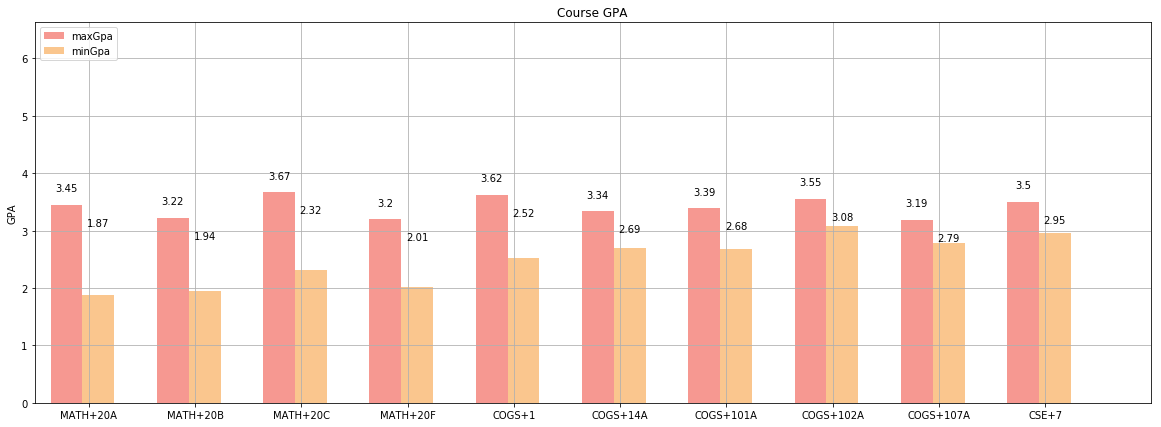

In [12]:
# Setting the positions and width for the bars
pos = list(range(len(gpaStats['course'])))
width = 0.3

# Plotting the bars
fig, ax = plt.subplots(figsize=(20,7))

# Create a bar with gpa data,
# in position pos,
plt.bar(pos, gpaStats['maxGpa'], width, alpha=0.5, color='#EE3224', label=gpaStats['course'][0])
plt.bar([p + width for p in pos], gpaStats['minGpa'], width, alpha=0.5, color='#F78F1E', label=gpaStats['course'][1])

# Set the y axis label, title, and positions of x
ax.set_ylabel('GPA')
ax.set_title('Course GPA')
ax.set_xticks([p + 0.7 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(gpaStats['course'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(gpaStats['maxGpa'] + gpaStats['minGpa'])] )

rects = ax.patches

#add number labels
for rect, label in zip(rects, gpaStats.maxGpa):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.2, label, ha='center', va='bottom')

rects = ax.patches
for rect, label in zip(rects, gpaStats.minGpa):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2 + 0.3, height - 0.4 , label, ha='center', va='bottom')

# Adding the legend and showing the plot
plt.legend(['maxGpa', 'minGpa'], loc='upper left')
plt.grid()
plt.show()

In the graph above, the best average GPA is a 3.67 for those in MATH 20C while the worst average GPA is a 1.87 in MATH 20A. COGS 107A has the smallest range between the highest average GPA and lowest average GPA while MATH 20A has the largest range. This means in classes like MATH 20A, there are professors that grade significantly harsher than others, causing a fluctuation in GPAs, but classes like COGS 107A have professors who grade around the same. Overall, with the highest GPA average being 3.67( A- is 3.7) and the lowest GPA average being 1.87 (C is 2.0), there's a difference of 1.8 (**more than a letter grade**). That's a huge significance when it comes to choosing which professor for each class. 

In the graph below represents a student who did average in every class where the class average was the highest compared to a student who did average in every class where the class average was the lowet. Both students did average in their respective classes but one student has nearly 1.0 higher overall GPA, a whole letter grade higher, than the other, from averaging in the higher scoring class. This shows that the professors chosen during course selection affected their GPA. 


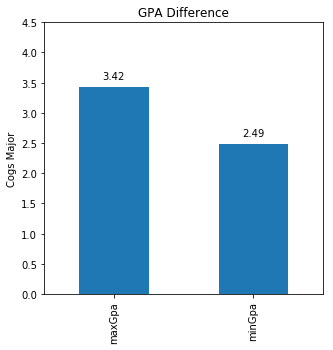

In [14]:
#do a comparison between maximum possible GPA and minimum possible GPA
avgMax = math.ceil(sum(maxGpa)/len(maxGpa) *100)/100
avgMin = math.ceil(sum(minGpa)/len(minGpa) *100)/100

comparison = [avgMax, avgMin]   # bring some raw data
freq_series = pd.Series.from_array(comparison)   # in my original code I create a series and run on that, so for consistency I create a series from the list.

x_labels = ['maxGpa' + 'minGpa']

# now to plot the figure
plt.figure(figsize=(5, 5))
ax = freq_series.plot(kind='bar')
plt.ylim([0, 4.5] )

rects = ax.patches

for rect, label in zip(rects, comparison):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.1, label, ha='center', va='bottom')
    
objects = ('maxGpa', 'minGpa')
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
plt.ylabel('Cogs Major')
plt.title('GPA Difference')
plt.show()

## Conclusions/Discussion

When it just comes to COGS majors, choosing a more lenient professor may help get you a higher GPA. **Having professors who grade evenly across the board will provide a fairer chance for everyone.** As opposed to having students hunt for professors who are more lenient with the gradebooks, students should have an equal chance in getting the same GPAs that doesn't rely on different types of professor grading habits. 


For the next few days, we aim explore our findings further and either cement it or debunk it by fully extracting data from other majors and the respective required courses. After comparing data from within majors, we will compare data across majors and professors. We will have graphs displaying our data and a full analysis on how the professors who grade more strictly affect students' GPAs overall.